## 딥러닝 기초
- 인간의 신경망을 모방해서 학습 및 예측하고 판단하는 기술
- 영상처리, 음성처리, 자연어처리, 이미지처리 분야 등에서 사용되고 있다.

In [ ]:
# 구글 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 작업하고 있는 위치 변경
%cd /content/drive/MyDrive/Colab Notebooks/deeplearning_2025

/content/drive/MyDrive/Colab Notebooks/deeplearning_2025


In [ ]:
# 현재 위치 확인
!pwd

/content/drive/MyDrive/Colab Notebooks/deeplearning_2025


### 목표
- 공부 시간에 따른 학생의 수학 성적을 예측하는 회귀 모델링

In [ ]:
# 데이터 분석에 필요한 라이브러리 3대장
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 데이터 로드
data = pd.read_csv('./data/student-mat.csv', delimiter=';')
data.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10


### 컬럼 설명

| 컬럼 이름       | 설명                             |
|-----------------|----------------------------------|
| school          | 학교 (GP - Gabriel Pereira, MS - Mousinho da Silveira) |
| sex             | 성별 (F - Female, M - Male)      |
| age             | 나이                             |
| address         | 주소 유형 (U - Urban, R - Rural) |
| famsize         | 가족 크기 (LE3 - 3명 이하, GT3 - 3명 초과) |
| Pstatus         | 부모 동거 상태 (T - 함께, A - 별거) |
| Medu            | 어머니 교육 수준 (0 - 없음, 1 - 초등, 2 - 중등, 3 - 고등, 4 - 대졸) |
| Fedu            | 아버지 교육 수준 (0 - 없음, 1 - 초등, 2 - 중등, 3 - 고등, 4 - 대졸) |
| Mjob            | 어머니 직업 (teacher, health, services, at_home, other) |
| Fjob            | 아버지 직업 (teacher, health, services, at_home, other) |
| reason          | 학교 선택 이유 (home, reputation, course, other) |
| guardian        | 보호자 (mother, father, other)  |
| traveltime      | 통학 시간 (1 - 15분 이하, 2 - 15~30분, 3 - 30분~1시간, 4 - 1시간 초과) |
| studytime       | 주간 공부 시간 (1 - 2시간 이하, 2 - 2~5시간, 3 - 5~10시간, 4 - 10시간 초과) |
| failures        | 과목 낙제 수 (n if 1<=n<3, else 4) |
| schoolsup       | 학교 추가 지원 (yes, no)        |
| famsup          | 가족 추가 지원 (yes, no)        |
| paid            | 과외 수업 참여 (yes, no)        |
| activities      | 학교 외 활동 참여 (yes, no)     |
| nursery         | 유치원 참여 여부 (yes, no)      |
| higher          | 고등교육 희망 여부 (yes, no)    |
| internet        | 가정 내 인터넷 접속 여부 (yes, no) |
| romantic        | 로맨틱 관계 여부 (yes, no)      |
| famrel          | 가족 관계의 질 (1 - 매우 나쁨, 5 - 매우 좋음) |
| freetime        | 여가 시간의 양 (1 - 매우 적음, 5 - 매우 많음) |
| goout           | 외출 빈도 (1 - 매우 적음, 5 - 매우 많음) |
| Dalc            | 평일 음주량 (1 - 매우 적음, 5 - 매우 많음) |
| Walc            | 주말 음주량 (1 - 매우 적음, 5 - 매우 많음) |
| health          | 현재 건강 상태 (1 - 매우 나쁨, 5 - 매우 좋음) |
| absences        | 결석 일수                        |
| G1              | 1학기 성적                       |
| G2              | 2학기 성적                       |
| G3              | 최종 성적                        |


In [ ]:
data.info()

# 결측치 없는 것 확인
# 숫자형 컬럼과 문자형 컬럼으로 구성
# 문자형으로 된 컬럼 -> 수치형으로 변경
# 원핫인코딩
# pd.get_dummies (문자형 컬럼만 모아서)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
# 가장 먼저 머신러닝 학습 -> 딥러닝과의 차이점
X = data[['studytime']] # 공부한 시간에 따른 성적을 예측하려고 하는 것이기 때문에
# 문제 데이터인 공부 시간을 2차원 데이터 형태로 변환
print(X.shape)
y = data['G3'] # 정답 데이터
print(y.shape)

(395, 1)
(395,)


In [ ]:
# train(학습지), test(시험지)로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

# 크기 확인
print("훈련 데이터 :", X_train.shape, y_train.shape)
print("테스트 데이터 :", X_test.shape, y_test.shape)

훈련 데이터 : (276, 1) (276,)
테스트 데이터 : (119, 1) (119,)


In [ ]:
from sklearn.linear_model import LinearRegression


# 1. 모델 객체 생성(lr_model)
lr_model = LinearRegression()

# 2. 학습
lr_model.fit(X_train, y_train)

# 3. 평가
lr_score = lr_model.score(X_test, y_test)  # 평가지표 -> 결정 계수(R²), 1에 가까울수록 좋은 성능
print(f"Linear Regression 모델의 R² 점수: {lr_score:.4f}")

Linear Regression 모델의 R² 점수: -0.0069


### 머신러닝(sklearn) vs 딥러닝 (Tensorflow) 모델링 비교
- 머신러닝
  - 모델 초기화(생성) -> 학습 -> 예측 및 평가
  - 다양한 알고리즘(모델)들이 이미 구현된 클래스로 제공
  - 완제품 로봇에 도색(하이퍼 파라미터)하는 느낌
- 딥러닝
  - 모델 설계(모델을 직접 구성) -> 학습 -> 예측 및 평가
  - 레고로 만드는 조립식 로봇(만들고 싶은 모양대로 만들어냄)
  - 원한다면 복잡한 구조 or 단순한 구조로 만들 수있다.

In [ ]:
# 딥러닝 모델링
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer

# Sequential : 뼈대, 층(Layer)을 순차적으로 쌓아 올리는 단순한 형태의 모델 구조
# inputLayer : 입력층
# Dense(완전연결층) : 중간층, 출력층 -> 신경망의 가장 기본적이고 널리 사용되는 레이어 유형 중 하나
#                     모든 뉴런(노드)들이 이전 층과 모두 연결되어 있는 층

In [ ]:
X_train.iloc[0].shape # 첫번째 행이 가진 모양

(1,)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1. 모델 설계 (신경망 구조 설계)
# 1-1. 뼈대 설계
model = Sequential()
# 1-2. 입력층 설계 -> 입력층의 모양을 결정
model.add(InputLayer(shape=(1,))) # 첫번째 행이 가진 모양으로 입력층 구성
# 1-3. 중간층(은닉층) 설계 -> 연산을 담당하는 부분 => 여기가 제일 중요한 부분, 나머지는 다 똑같은 코드 쓴다고 생각
model.add(Dense(units=64, activation='sigmoid'))
model.add(Dense(units=128, activation='sigmoid'))
model.add(Dense(units=64, activation='sigmoid'))
model.add(Dense(units=32, activation='sigmoid'))
# units(노드, 유닛, 뉴런)의 개수 -> 정답이 없다
# 은닉층을 몇 겹으로 할지에도 정답은 없다.
# 다만, 일반적인 경험(많은 사람들이 써본 결과)에 따르면 "항아리 모양"의 성능이 우수하게 나온다.

# 1-4. 출력층 -> 출력의 모양을 결정
model.add(Dense(units=1)) # 기본값은 Linear(항등함수)

In [ ]:
# 2. 학습 방법 설정
model.compile(
    loss = "mean_squared_error", # 모델의 오차(잘못된 정도)를 측정하는 손실함수(도구) 설정
    optimizer = 'SGD', # 최적화 함수(경사하강법 사용)
    metrics = ["mse"] # 평가지표
)

In [ ]:
# 3. 학습
h = model.fit(X_train, y_train,
              validation_split = 0.2, # train set의 20%를 val set으로 지정
              epochs = 20 # 전체 훈련 데이터셋을 몇 번 학습 시킬것인지에 대한 횟수
              )

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 80.0552 - mse: 80.0552 - val_loss: 21.6605 - val_mse: 21.6605
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 18.7639 - mse: 18.7639 - val_loss: 20.5273 - val_mse: 20.5273
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 21.2820 - mse: 21.2820 - val_loss: 21.1422 - val_mse: 21.1422
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 19.5356 - mse: 19.5356 - val_loss: 20.4715 - val_mse: 20.4715
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 19.8758 - mse: 19.8758 - val_loss: 20.4989 - val_mse: 20.4989
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 19.1624 - mse: 19.1624 - val_loss: 21.5335 - val_mse: 21.5335
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 20.4964 - mse: 20.4964 - val_loss: 20.7937 - val_mse: 20.7937
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 22.2010 - mse: 22.2010 - val_loss: 20.3951 - val_mse: 20.3951
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

In [ ]:
# 4. 예측
model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[9.889488],
       [9.892107],
       [9.889488],
       [9.892107],
       [9.892107],
       [9.889488],
       [9.889488],
       [9.892107],
       [9.889488],
       [9.892107],
       [9.892107],
       [9.892107],
       [9.889488],
       [9.892107],
       [9.894518],
       [9.889488],
       [9.894518],
       [9.896673],
       [9.892107],
       [9.894518],
       [9.889488],
       [9.889488],
       [9.892107],
       [9.892107],
       [9.894518],
       [9.889488],
       [9.892107],
       [9.892107],
       [9.892107],
       [9.896673],
       [9.889488],
       [9.889488],
       [9.892107],
       [9.892107],
       [9.889488],
       [9.892107],
       [9.894518],
       [9.894518],
       [9.894518],
       [9.892107],
       [9.889488],
       [9.896673],
       [9.892107],
       [9.892107],
       [9.894518],
       [9.892107],
       [9.896673],
       [9.889488],
       [9.892107],
       [9.892107],
       [9.889488],
       [9.889488],
       [9.89

In [ ]:
# 5. 평가 -> sklearn에서는 score()
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 22.5031 - mse: 22.5031 


[21.691057205200195, 21.691057205200195]

In [ ]:
# 7/2 시작
# 모델의 복잡도 곡선 시각화
# 히스토리 객체
h.history.keys() # 모델의 학습 결과 정보를 담아놓는 객체

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

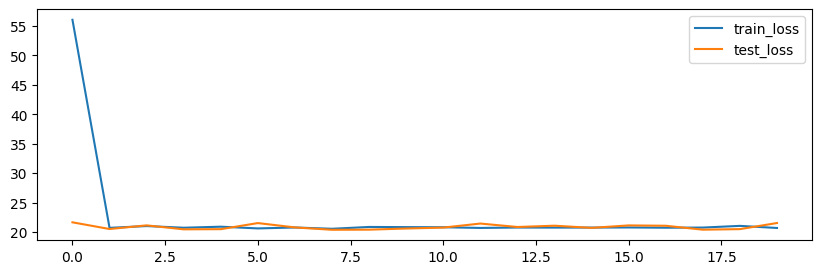

In [ ]:
plt.figure(figsize = (10,3))
plt.plot(h.history['loss'], label = 'train_loss')
plt.plot(h.history['val_loss'], label = 'test_loss')
plt.legend()
plt.show()

# 모델의 복잡도 곡선을 살펴보는 이유 : 모델의 과대/과소 적합을 확인하기 위함
# 1번째 epoch가 오차값이 가장 높고, epoch 2번부터는 큰 차이가 없이 오차값이 20정도로 유지된다.
# 랜덤한 w와 b값이 주어진 첫 번째 epoch에서만 오차가 높고 그 이후로는 완화된 모습이 관찰됨
# loss값이 20정도로 계속 유지되는 이유(더 이상 완화되지 않는 이유)는 특성이 한개라서가 아닐까..
# 라고 예측해볼 수 있겠다.

### 문제데이터의 개수를 최대 6개까지 설정하여 학습 (실습)
- 수치형으로 되어있는 컬럼만 가져다 사용
, 문자형 데이터 수치로 바꿔서 사용해도됨
- 은닉층과 노드의 수는 그대로 -> 입력층에 변화

In [ ]:
# 모델의 복잡도 곡선까지 그려서 팀별로 카톡방에 올리기

In [ ]:
# 숫자로 된 컬럼만 골라오기
numeric_data = data.select_dtypes(include='number')

# G3는 정답이니까 빼고, 입력으로 쓸 6개 선택
X = numeric_data[['studytime', 'failures', 'absences', 'G1', 'G2', 'goout']]
y = numeric_data['G3']  # 정답은 그대로

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=5
)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer

model = Sequential()
model.add(InputLayer(shape=(X_train.shape[1],)))  # ← 6개의 입력
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1))  # 출력층

# 학습 설정
model.compile(loss='mean_squared_error', optimizer='SGD', metrics=['mse'])

# 학습하기
h = model.fit(X_train, y_train, validation_split=0.2, epochs=20)

# 평가
model.evaluate(X_test, y_test)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 80.4239 - mse: 80.4239 - val_loss: 22.1292 - val_mse: 22.1292
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 21.2547 - mse: 21.2547 - val_loss: 21.5851 - val_mse: 21.5851
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 17.5613 - mse: 17.5613 - val_loss: 21.1582 - val_mse: 21.1582
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 19.1634 - mse: 19.1634 - val_loss: 20.6884 - val_mse: 20.6884
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 22.2516 - mse: 22.2516 - val_loss: 20.8945 - val_mse: 20.8945
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 20.7969 - mse: 20.7969 - val_loss: 20.7078 - val_mse: 20.7078
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 23.3895 - mse: 23.3895 - val_loss: 20.3831 - val_mse: 20.3831
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 21.4419 - mse: 21.4419 - val_loss: 20.4189 - val_mse: 20.4189
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

[21.454374313354492, 21.454374313354492]

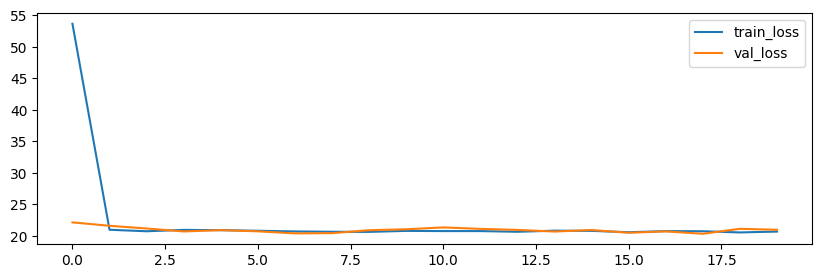

In [ ]:
# 학습 그래프 그리기
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.plot(h.history['loss'], label='train_loss')
plt.plot(h.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
# 인사이트
# 학생들의 수학성적을 예측하는 실습을 했는데, 특성 수에 변화를 주어도 그래프에서 큰 변화가 일어나진 않았다.
# 학생들의 수학성적이 공부시간, 통학시간, 주간음주량, 건강 등등의 영향을 받는다기보다는 학생 개개인의 노력이
# 성적을 만들어내는 것은 아닐까.. 라고 추측해볼 수 있다.